## Heart Failure Prediction (FINAL)
### name: Luigi Otoya
### Course: CSc 447 Machine Learning

In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from matplotlib.colors import ListedColormap

## %matplotlib

#### Interpreting the data
**[0] Age:** integer value  
**[1] Sex:** Male or Female, can change to Male=1, Female=0  
**[2] ChestPainType:**
* **ATA:**  Atypical Angina
* **TA:** Typical Angina
* **NAP:** Non-anginal pain
* **ASY:** Asymptomatic  

**[3] RestingBP:** integer value  
**[4] Cholesterol:** integer value  
**[5] FastingBloodSugar:** integer value 0 or 1
**[6] RestingElectrocardioGraphic Results:**
* **value 0:** normal
* **value 1:** ST
* **value 2:** showing probable or definite LVH(Left Ventricular Hypertrophy)

**[7] MaxHR:** integer value
**[8] ExerciseAngina:** Y or N, cam change to Y=1, N=0  
**[9] OldPeak:** ST depression induced by exercise relative to rest, integer value  
**[10] ST_Slope:** The slope of the peak exercise ST segment
* **value 0:** upsloping (Up)
* **value 1:** flat
* **value 2:** downsloping (down)

**[11] HeartDiesease:**
* **value 0:** < 50% diameter narrowing
* **value 1:** > 50% diameter narrowing

In [324]:
# read data set
df = pd.read_csv('heart.csv')  
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


## Pre-Process the data
* ### Determine Categorical and Numerical Variables
* ### Determine and Handle Outliers in the Data

In [296]:
# Check for missing values and duplicates
print('Duplicates:', df.duplicated().sum())
print('Missing Values:', df.isnull().sum().sum())

Duplicates: 0
Missing Values: 0


**Found  that there are no duplicates nor are there missing values in the data**

* ### Determine the Datatypes of the Data

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 68.2+ KB


* ### Descriptive Statistical Summary of the Data

In [323]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,0.520630,0.661983,0.329684,0.233115,0.540911,0.396291,0.553377
std,0.192502,0.092571,0.181400,0.423046,0.179298,0.121201,0.497414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387755,0.600000,0.287313,0.000000,0.422535,0.295455,0.000000
50%,0.530612,0.650000,0.369818,0.000000,0.549296,0.363636,1.000000
75%,0.653061,0.700000,0.442786,0.000000,0.676056,0.465909,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [299]:
print('FastingBS values:', df.FastingBS.unique())
print('HeartDisease values:', df.HeartDisease.unique())

FastingBS values: [0 1]
HeartDisease values: [0 1]


#### **We have columns FastingBS and HeartDisease with only two possible numerical values, either 0 or 1.**

* ### Numerical Variables

In [253]:
def figDesign():
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks(fontsize=15, color='black')
    plt.xticks(fontsize=15, color='black')
    plt.box(False)
    plt.title(i[1], fontsize=24, color='black')
    plt.tight_layout(pad=4.0)

In [300]:
numVar = df.select_dtypes(exclude='object')
numVarHeader = numVar.columns
numVar

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


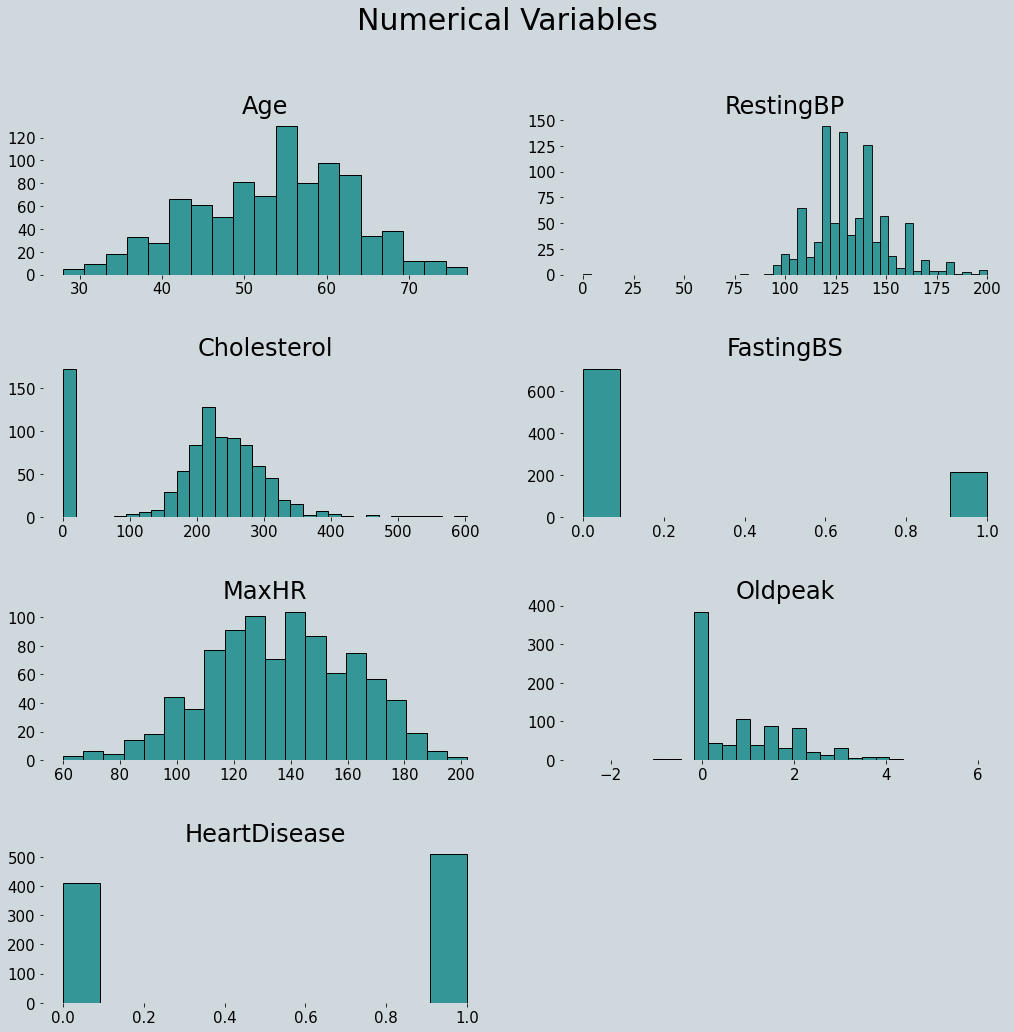

In [301]:
fig, ax = plt.subplots(figsize =(15, 15))
fig.patch.set_facecolor('#CFD8DC')

# enumerate returns two values: the index in i[0] and the value in i[1]
for i in (enumerate(numVarHeader)):
    plt.subplot(4, 2, i[0]+1)
    sns.histplot(x = i[1], data = df, color='teal', edgecolor='black')
    figDesign()
    plt.suptitle('Numerical Variables', fontsize=30)

* ### Catergorical Variables

In [302]:
catVar = df.select_dtypes(include='object')
catVarHeader = catVar.columns
catVar

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


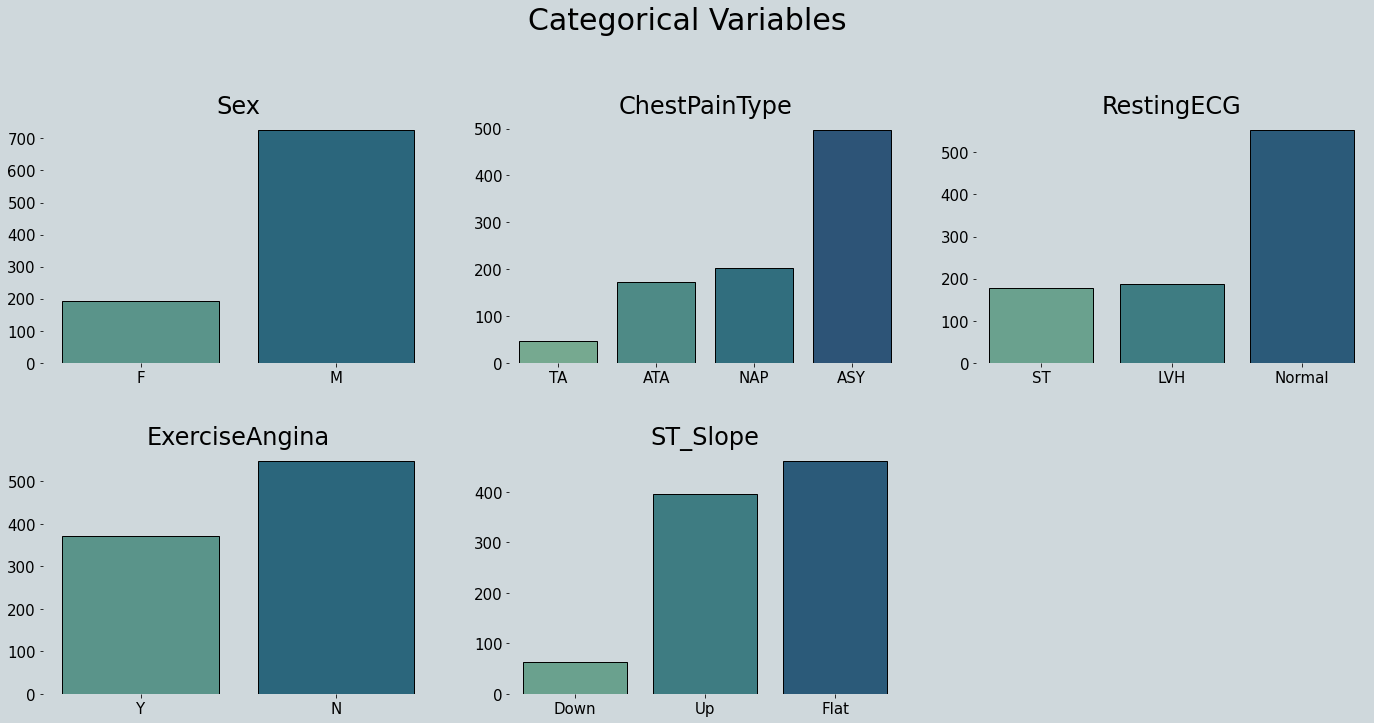

In [368]:
fig, ax = plt.subplots(figsize =(20, 15))
fig.patch.set_facecolor('#CFD8DC')

for i in (enumerate(catVarHeader)):
    plt.subplot(3, 3, i[0]+1)
    sns.countplot(x = i[1], data = df, order=df[i[1]].value_counts(ascending=True).index, palette='crest', edgecolor='black')
    figDesign()
    plt.suptitle('Categorical Variables', fontsize=30)

* ### Outliers
  * **We can use a boxplot to display the distribution of the data and find the outliers**
  * **First we must normalize the data**

Text(0.5, 1.0, 'Outliers')

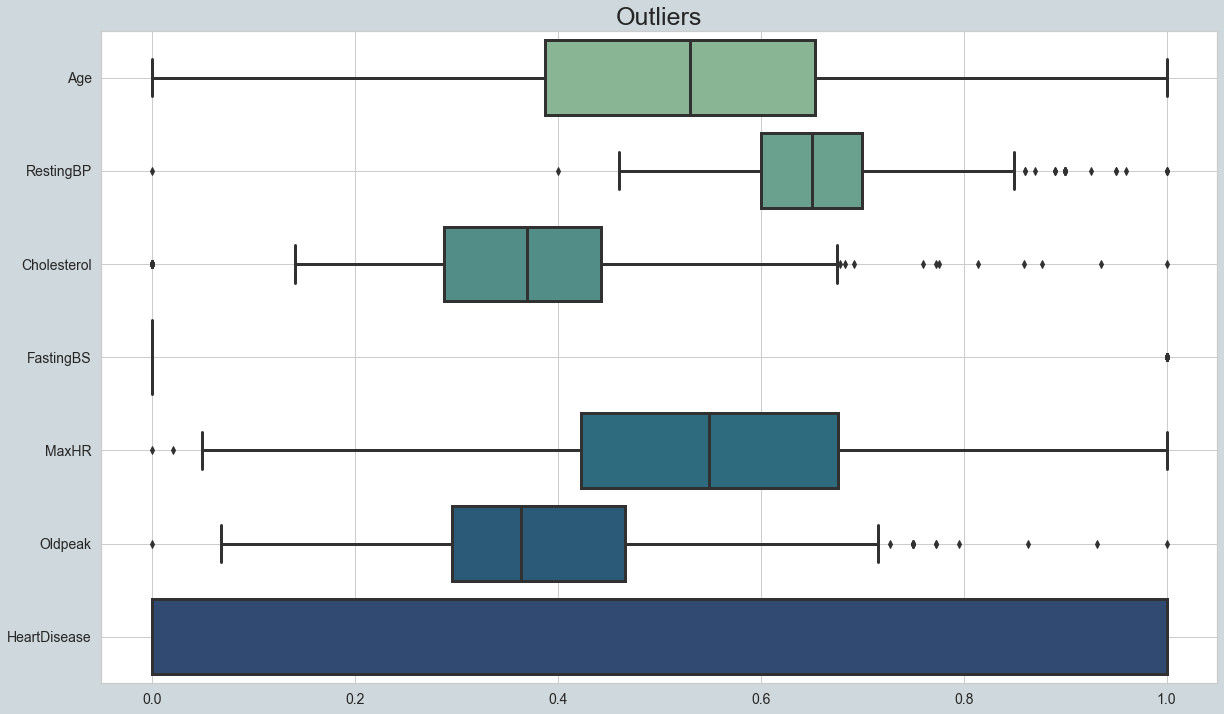

In [396]:
from sklearn.preprocessing import MinMaxScaler
fig, ax = plt.subplots(figsize =(20, 12))
fig.patch.set_facecolor('#CFD8DC')

# Normalize the data from [0, 1]
dfNorm = df.copy()

for header in numVarHeader:
  dfNorm[header] = MinMaxScaler().fit_transform(df[[header]])

sns.boxplot(data=dfNorm, ax=ax, palette='crest', orient="h", linewidth=3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.grid(True)
ax.set_title('Outliers', fontsize=25)

  * **We can see from the graph above that there are outliers on MaxHR (max heartrate) equal to 0.**
  * **There are also outliers equal to 0 in RestingBloodPressure.**
  * **We should remove the outlier for RestingBP because a RestingBP of 0 can never get to zero.**
  * **Even a dead person will have BP > 0.**